> # Story Concept: Adil & Harry Learn Resume Screening
Adil is an experienced Python developer and machine learning enthusiast. Harry, his curious friend, wants to understand how companies automatically screen resumes. Adil decides to teach him using a project they’ll build together step by step...

In [1]:
# Scene 1: Starting the Journey
# Adil: "Let’s begin, Harry! First, we’ll import the tools we need."
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Harry: "So numpy is for math, pandas is for handling tables, and those two are for graphs, right?"
# Adil: "Exactly! You’re already getting it!"

In [2]:
# Scene 2: Loading the Resume Data
# Adil: "Now Harry, let’s load our resume dataset into a DataFrame so we can explore it.
df = pd.read_csv('UpdatedResumeDataSet.csv')

# Adil: "Let’s peek at the first few rows to get a sense of the data."
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
# Harry: "Cool! So each row is a resume?"
# Adil: "Exactly. Each resume has a 'Resume' column with text and a 'Category' that tells the field — like Data Science, HR, etc."

# Let’s also check how many rows and columns we have.
df.shape

(962, 2)

In [4]:
print("Number of resumes:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of resumes: 962
Number of columns: 2


# Exploring Categories

In [5]:
#Scene 3: Exploring Resume Categories
# Adil: "Alright Harry, now let's see how many resumes belong to each job field or category."

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


C:\Users\Adil\AppData\Local\Temp\ipykernel_13032\2446621858.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


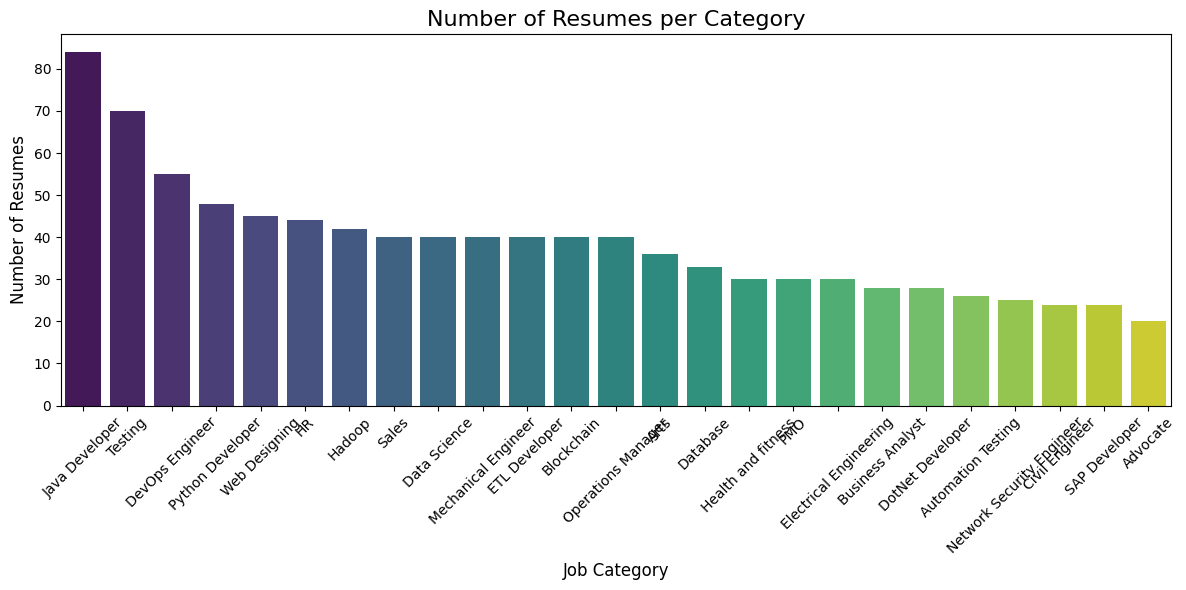

In [6]:
# Count the categories
category_counts = df['Category'].value_counts()

# Display counts
print(category_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Number of Resumes per Category", fontsize=16)
plt.xlabel("Job Category", fontsize=12)
plt.ylabel("Number of Resumes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 #### Adil Explains:

> "Harry, this bar chart gives us a quick overview of which fields are most common in our dataset. It's useful because if we’re building a classifier later, we should know if the dataset is balanced or skewed."

C:\Users\Adil\AppData\Local\Temp\ipykernel_13032\1414087689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set2')


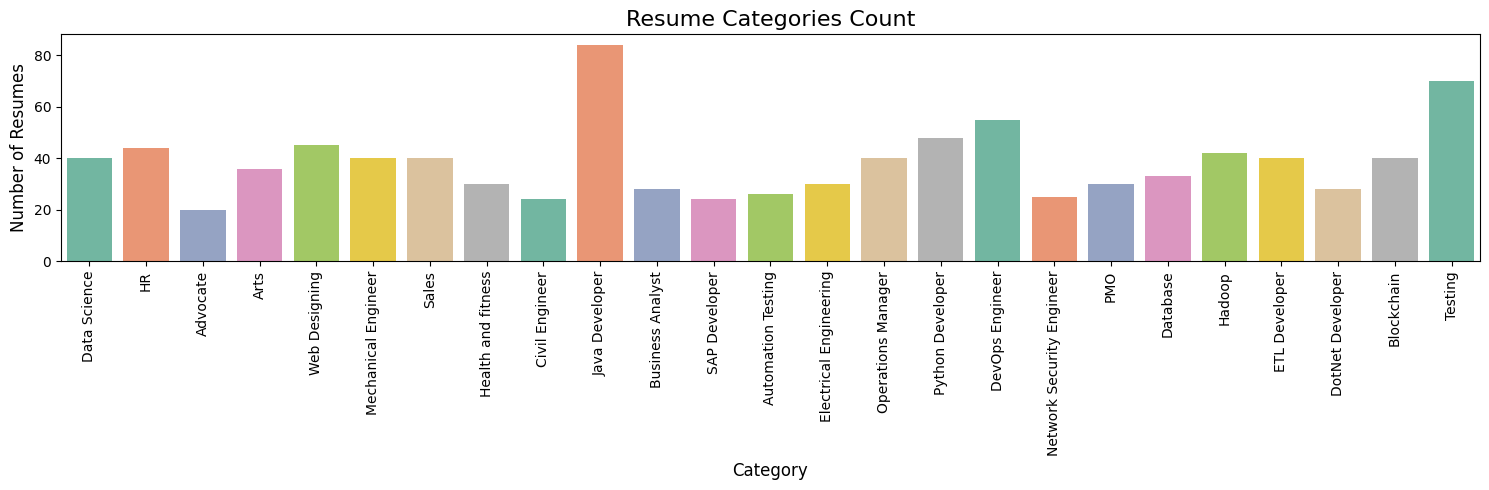

In [7]:
# Scene 4: Visualizing Resume Categories
# Adil: "Harry, let’s turn the resume categories into a visual story."

plt.figure(figsize=(15, 5))
sns.countplot(x='Category', data=df, palette='Set2')
plt.title("Resume Categories Count", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Resumes", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Story Moment
> Harry: “Wow! That’s much easier to understand than just looking at numbers.”

> Adil: “Exactly! Data visualizations help us communicate insights quickly — especially useful if we want to present this to a recruiter or team.”

In [8]:
#  Scene 5: Discovering Unique Categories
# Adil: "Harry, before we build anything, we should know what types of resume categories we're working with."
unique_categories = df['Category'].unique()
print("Unique Resume Categories:")
print(unique_categories)

Unique Resume Categories:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


#### Explanation
> Harry: “So 'unique()' just lists all the different job fields we have?”

> Adil: “Exactly. This helps us understand what classes our future model might need to predict.”

In [9]:
print("Number of Unique Categories:", len(unique_categories))
print("Categories:")
for idx, cat in enumerate(unique_categories, 1):
    print(f"{idx}. {cat}")

Number of Unique Categories: 25
Categories:
1. Data Science
2. HR
3. Advocate
4. Arts
5. Web Designing
6. Mechanical Engineer
7. Sales
8. Health and fitness
9. Civil Engineer
10. Java Developer
11. Business Analyst
12. SAP Developer
13. Automation Testing
14. Electrical Engineering
15. Operations Manager
16. Python Developer
17. DevOps Engineer
18. Network Security Engineer
19. PMO
20. Database
21. Hadoop
22. ETL Developer
23. DotNet Developer
24. Blockchain
25. Testing


#### Scene 6: Pie Chart Trouble — and Fixing It
> Harry: “Adil, I tried making a pie chart, but something feels off. The colors don’t match all categories!”

> Adil: “Good catch, Harry! The issue is in the color array — you're only generating 3 colors, but we probably have more categories.”


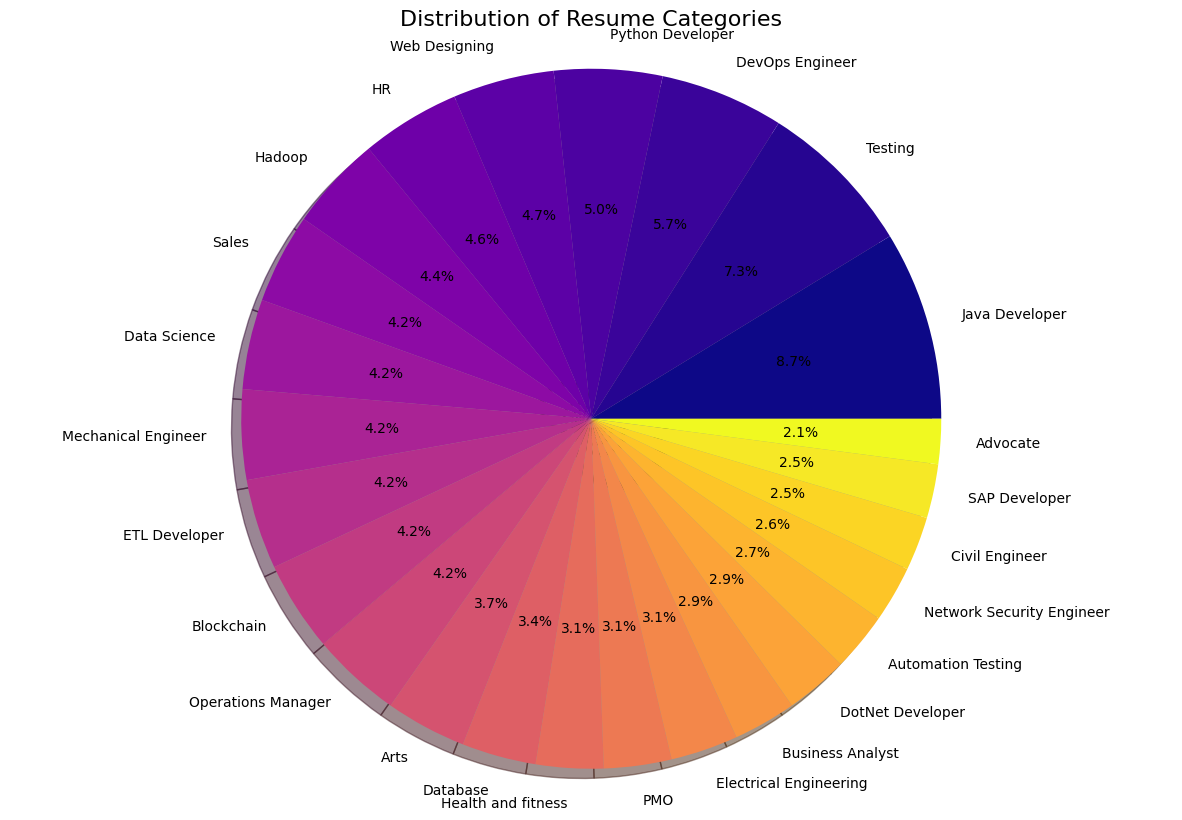

In [10]:
# Prepare data
counts = df['Category'].value_counts()
labels = counts.index

# Plot
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True,
        colors=plt.cm.plasma(np.linspace(0, 1, len(labels))))  # dynamically adjust colors

plt.title("Distribution of Resume Categories", fontsize=16)
plt.axis('equal')  # Makes the pie chart a perfect circle
plt.show()

####  Story Moment
> Harry: “Ah, now it shows all the categories properly — and with fancy colors too!”

> Adil: “Exactly! Always make sure your color array matches the number of items you're plotting. It’s small things like these that make visualizations more accurate and professional.”

# Exploring Resume

In [11]:
# Scene 7: Peeking Into a Resume
# Adil: "Let’s inspect the very first resume in our dataset, Harry."

print("Category:", df['Category'][0])
print("\nResume Preview:\n")
print(df['Resume'][0][:1000])  # Limit output to first 1000 characters to avoid too much clutter

Category: Data Science

Resume Preview:

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud In

#### Adil Explains:
> "Each resume here is a long chunk of text, usually unstructured. It contains skills, education, experience — all mixed up! Our job is to process and clean this text before we can use it for training a machine learning model."

In [12]:
# Preview a cleaner snippet
resume_text = df['Resume'][0]
print(resume_text[:500])  # first 500 characters

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib


In [13]:
# Check 5 sample resumes and their categories
for i in range(5):
    print(f"\n--- Resume {i+1} ---")
    print("Category:", df['Category'][i])
    print("Text Preview:", df['Resume'][i][:300])


--- Resume 1 ---
Category: Data Science
Text Preview: Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language pr

--- Resume 2 ---
Category: Data Science
Text Preview: Education Details 
May 2013 to May 2017 B.E   UIT-RGPV
Data Scientist 

Data Scientist - Matelabs
Skill Details 
Python- Exprience - Less than 1 year months
Statsmodels- Exprience - 12 months
AWS- Exprience - Less than 1 year months
Machine learning- Exprience - Less than 1 year months
Skl

--- Resume 3 ---
Category: Data Science
Text Preview: Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senio

#### Story Moment
> Harry: "Whoa, this resume is just one giant blob of text!"

> Adil: "Yup! And that’s why we need Natural Language Processing (NLP) — to clean it, break it down, and make it useful for machines to understand."

# Exploring Resume

In [14]:
# Scene 8: Balancing Resume Categories
# Adil: "Harry, remember how some categories had way fewer resumes than others?"
# Adil: "If we train a model on that, it might get biased towards the bigger categories."
# Adil: "To fix this, we'll balance the dataset by oversampling smaller categories — copying some resumes until all categories have the same number."

print("Original Category Distribution:")
print(df['Category'].value_counts())

# Find the max number of resumes in any category
max_size = df['Category'].value_counts().max()

# Oversample smaller categories to match max_size
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle to mix the rows randomly after oversampling
df = balanced_df.sample(frac=1).reset_index(drop=True)

print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
Health and fitness           84
Web Designing                84
Testin

C:\Users\Adil\AppData\Local\Temp\ipykernel_13032\613799409.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


#### Why Oversampling?
> Harry: "Why do we copy some resumes, though? Isn’t that cheating?"

> Adil: "Good question! It's a trade-off — we risk overfitting by repeating data, but it prevents the model from ignoring smaller classes. Another option is to collect more data or try advanced techniques like SMOTE, but oversampling is a great start."

# Cleaning Data:
1 URLs, <br>
2 hashtags, <br>
3 mentions, <br>
4 special letters, <br>
5 punctuations: 

In [15]:
# Scene 9: Cleaning the Resumes with Regex Magic
# Adil: "Harry, resumes can be messy! They may have URLs, hashtags, mentions, special characters, and random punctuation."
# Adil: "We need to clean all of that so our machine learning model doesn't get confused."

import re

def cleanResume(txt):
    # Remove URLs like http://something
    cleanText = re.sub(r'http\S+\s?', ' ', txt)
    
    # Remove Twitter RT (retweet) or cc if any
    cleanText = re.sub(r'RT|cc', ' ', cleanText)
    
    # Remove hashtags (#something)
    cleanText = re.sub(r'#\S+\s?', ' ', cleanText)
    
    # Remove mentions (@username)
    cleanText = re.sub(r'@\S+', ' ', cleanText)
    
    # Remove punctuation and special characters
    cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    
    # Remove non-ASCII characters (like emojis)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    
    # Replace multiple spaces with single space
    cleanText = re.sub(r'\s+', ' ', cleanText)
    
    # Strip leading/trailing spaces
    cleanText = cleanText.strip()
    
    return cleanText

# Test the function with an example
test_text = "my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com"
print(cleanResume(test_text))

my webiste like is this and a ess it


<>:21: SyntaxWarning: invalid escape sequence '\]'
<>:21: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Adil\AppData\Local\Temp\ipykernel_13032\2851396783.py:21: SyntaxWarning: invalid escape sequence '\]'
  cleanText = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)


#### Explanation from Adil:
> “See Harry, this cleaning step removes all the unnecessary noise in the resumes — like links, usernames, hashtags, and weird punctuation. That way, when we teach the computer, it focuses on the important words.”

In [16]:
# Clean all resumes in the dataset
df['Resume'] = df['Resume'].apply(cleanResume)

# Check cleaned version of first resume
print(df['Resume'][0])

Education Details January 2009 P G Sports science Dr BMN College of Home Science January 2008 BSc Food Science Nutrition Dr BMN College of Home Science January 2004 HSC Central Railway s Jr college of Science and Commerce January 2002 SSC HISTORY IES s Modern English School MSc Nutrition College of Home Science nutritionist and health promoter 9yrs experience as a nutritionist and health coach Skill Details Company Details company UGC NET description CAREER OBJECTIVE To use my qualifications as a nutritionist and health promoter to contribute to the well being of individuals in the community UGC NET Certificate for Lectureship MAR 2013 SKILLS LEARNT Working in a team environment Working as an individual Time management to ensure all customers are served sufficiently and all tasks are completed to a high standard Working under pressure and in a busy environment Personal presentation Communication Skills 9 years of work experience at healthcare startups health clubs has enhanced my commu

# words into categorical values

In [17]:
# Scene 10: Turning Categories into Numbers
# Adil: "Harry, computers understand numbers better than text."
# Adil: "So we convert our job categories like 'Data Science' or 'HR' into numeric labels."

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Learn mapping from text labels to numbers
le.fit(df['Category'])

# Transform categories into numeric labels
df['Category'] = le.transform(df['Category'])

# Check unique numeric labels
print("Unique numeric categories:", df['Category'].unique())

# Optionally, check mapping for reference
print("Category mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label} --> {i}")

Unique numeric categories: [14 24 23 21 17 15 22 12 11 19  4  0 18  8  2  6  3 16 13  5 20  9  1  7
 10]
Category mapping:
Advocate --> 0
Arts --> 1
Automation Testing --> 2
Blockchain --> 3
Business Analyst --> 4
Civil Engineer --> 5
Data Science --> 6
Database --> 7
DevOps Engineer --> 8
DotNet Developer --> 9
ETL Developer --> 10
Electrical Engineering --> 11
HR --> 12
Hadoop --> 13
Health and fitness --> 14
Java Developer --> 15
Mechanical Engineer --> 16
Network Security Engineer --> 17
Operations Manager --> 18
PMO --> 19
Python Developer --> 20
SAP Developer --> 21
Sales --> 22
Testing --> 23
Web Designing --> 24


#### Adil Explains:
> "LabelEncoder converts categories into numbers so our model can work with them. The numbers themselves don’t have mathematical meaning — they’re just IDs."

# Vactorization

In [18]:
# Scene 11: Converting Text to Numbers with TF-IDF
# Adil: "Harry, words themselves can't be directly used by ML models."
# Adil: "So we turn resumes into numbers that capture how important words are using TF-IDF."

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer to ignore common English stopwords
tfidf = TfidfVectorizer(stop_words='english')

# Learn vocabulary and idf from resumes
tfidf.fit(df['Resume'])

# Transform all resumes into TF-IDF feature matrix (sparse matrix)
X = tfidf.transform(df['Resume'])

print(f"TF-IDF matrix shape: {X.shape}")

TF-IDF matrix shape: (2100, 7280)


#### Adil Explains:
> "TF-IDF stands for Term Frequency-Inverse Document Frequency — it gives higher scores to words that are important in a resume but rare across all resumes. This way, the model focuses on unique skills or keywords."

# Splitting

In [19]:
# Scene 12: Splitting Data into Training and Testing Sets
# Adil: "Harry, to check if our model really learns, we split data into training and testing sets."
# Adil: "The model trains on the training set and we test it on unseen data — the test set."

from sklearn.model_selection import train_test_split

# 'X' is our feature matrix, 'y' are the labels
X_train, X_test, y_train, y_test = train_test_split(
    X,                   # Features (TF-IDF matrix)
    df['Category'],      # Target labels
    test_size=0.2,       # 20% data for testing
    random_state=42      # For reproducibility
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1680, 7280)
Testing data shape: (420, 7280)


#### Adil Explains:
"We keep 80% of data for training and 20% for testing. The `random_state` ensures the split is the same every time you run this."

# Now let’s train the model and print the classification report:

In [20]:
# Scene 13: Training the KNN Model & Evaluating Performance
# Adil: "Harry, now we’ll train our first model: K-Nearest Neighbors."
# Adil: "It looks at the closest resumes to decide the category of a new one."
# Adil: "Since we have multiple categories, we use OneVsRestClassifier to handle them."

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert sparse matrices to dense arrays if needed
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Initialize and train the model
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train_dense, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_dense)

# Evaluate results
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


KNeighborsClassifier Results:
Accuracy: 0.9952
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 11  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  

### Adil Explains:
> “KNN works by looking at the ‘neighbors’ of a resume — the most similar ones — to decide the category. The classification report shows precision, recall, and F1-score for each category so we can see how well it’s performing.”

In [21]:
# Scene 14: Training the Support Vector Classifier (SVC)
# Adil: "Harry, SVM is a powerful model that tries to find the best boundary to separate categories."
# Adil: "We’ll train it the same way as before, using OneVsRestClassifier to handle multiple classes."

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the SVC model
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train_dense, y_train)

# Predict on test data
y_pred_svc = svc_model.predict(X_test_dense)

# Evaluate results
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


SVC Results:
Accuracy: 1.0000
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0 

#### Adil Explains:
> “SVM tries to maximize the margin between different categories, making it robust and effective for text classification.”

In [22]:
# Scene 15: Training the Random Forest Classifier
# Adil: "Harry, Random Forest builds many decision trees and combines their votes to improve accuracy."
# Adil: "It’s great for handling complex data and avoiding overfitting."

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Random Forest model
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train_dense, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test_dense)

# Evaluate results
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


RandomForestClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0

#### Adil Explains:
> “Random Forest creates many decision trees and averages their predictions to be more accurate and stable.”

## Save Files

In [23]:
# Adil: "Harry, we’ve trained our models — now let’s save them!"
# Adil: "That way, we won’t need to retrain every time we want to use them."

import pickle

# Save the TF-IDF vectorizer
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

# Save the trained classifier model (using the best one – here, SVC)
pickle.dump(svc_model, open('clf.pkl', 'wb'))

# Save the label encoder for decoding predicted categories later
pickle.dump(le, open("encoder.pkl", 'wb'))

print("All components saved successfully!")# Adil: "Harry, we’ve trained our models — now let’s save them!"
# Adil: "That way, we won’t need to retrain every time we want to use them."

All components saved successfully!
All components saved successfully!


## Prediction System

In [24]:
# Adil: "Now Harry, let’s write a function that takes any resume text and tells us the job category!"
# Adil: "We’ll clean it, vectorize it, predict it, and decode the result."

def predict_resume_category(input_resume):
    # Step 1: Clean the resume text
    cleaned_text = cleanResume(input_resume)
    
    # Step 2: Vectorize using trained TF-IDF model
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Step 3: Convert to dense array (if necessary for classifier)
    vectorized_text = vectorized_text.toarray()
    
    # Step 4: Predict using trained SVC model
    predicted_label = svc_model.predict(vectorized_text)
    
    # Step 5: Convert label back to category name
    predicted_category = le.inverse_transform(predicted_label)

    return predicted_category[0]

In [25]:
sample_resume = """Experienced software engineer skilled in Python, machine learning, and data analysis. Worked on various AI projects..."""
print("Predicted Category:", predict_resume_category(sample_resume))

Predicted Category: Data Science


In [27]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
predict_resume_category(myresume)

'Network Security Engineer'

In [28]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

predict_resume_category(myresume)

'Data Science'